# 1. AutoEncoder Demo (FC + different hidden layers)

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (29/08/2023)

**Requirements:**
- Python 3 (tested on v3.11.4)
- Matplotlib (tested on v3.7.2)
- Numpy (tested on v1.25.2)
- Torch (tested on v2.0.1+cu118)
- Torchvision (tested on v0.15.2+cu118)
- We also strongly recommend setting up CUDA on your machine! (At this point, honestly, it is almost mandatory).

### Imports

In [1]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [2]:
# CUDA check
CUDA = True
device = "cuda" if (torch.cuda.is_available() and CUDA) else "cpu"
print(torch.cuda.is_available())
print(device)

True
cuda


### Dataset and dataloaders

As seen many times before...

In [3]:
# Data Preprocessing
# - ToTensor
# - Image Normalization
transform = transforms.Compose([transforms.ToTensor(), \
                                transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
# Train datasets/dataloaders
train_set = torchvision.datasets.MNIST(root='./data', \
                                       train = True, \
                                       download = True, \
                                       transform = transform)
train_loader = torch.utils.data.DataLoader(train_set, \
                                           batch_size = 32, \
                                           shuffle = False)

In [5]:
# Test datasets/dataloaders
test_set = torchvision.datasets.MNIST(root = './data', \
                                      train = False, \
                                      download = True, \
                                      transform = transform)
test_loader = torch.utils.data.DataLoader(test_set, \
                                          batch_size = 5, \
                                          shuffle = False)

### Model

Fully connected and hidden layer size can be chosen freely.

We will then play with different sizes for the hidden_layer parameter, which defines the size of the bottleneck/embedding vector of the autoencoder.

In [6]:
# Define AutoEncoder Model for MNIST
class MNIST_Autoencoder(nn.Module):

    def __init__(self, hidden_layer = 3):
        
        # Init from nn.Module
        super().__init__()
        
        # Encoder part will be a simple FC + ReLU.
        self.encoder = nn.Sequential(nn.Linear(28*28, hidden_layer), nn.ReLU(True))
        
        # Decoder part will be a simple FC + Tanh
        self.decoder = nn.Sequential(nn.Linear(hidden_layer, 28*28), nn.Tanh())
        

    def forward(self,x):
        
        # Forward is encoder into decoder
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### Model (hidden_size = 5)

In [7]:
# Initialize MNIST Autoencoder
torch.manual_seed(0)
model = MNIST_Autoencoder(hidden_layer = 5).to(device)

In [8]:
# Defining Parameters
# - MSE Loss, which will be our reconstruction loss for now
# - Adam as optimizer
# - 25 Epochs
# - 128 as batch size
num_epochs = 25
batch_size = 128
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay = 1e-5)

In [9]:
# Trainer
outputs_list = []
loss_list = []
for epoch in range(num_epochs):
    for data in train_loader:
        
        # Flatten image and send data to device
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).to(device)
        
        # Forward pass
        output = model(img)
        loss = distance(output, img)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Display
    print('epoch {}/{}, loss {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    outputs_list.append((epoch, img, output),)
    loss_list.append(loss.item())

epoch 1/25, loss 0.6425
epoch 2/25, loss 0.6403
epoch 3/25, loss 0.5930
epoch 4/25, loss 0.5702
epoch 5/25, loss 0.5222
epoch 6/25, loss 0.5172
epoch 7/25, loss 0.5162
epoch 8/25, loss 0.5159
epoch 9/25, loss 0.5159
epoch 10/25, loss 0.5159
epoch 11/25, loss 0.5159
epoch 12/25, loss 0.5155
epoch 13/25, loss 0.5149
epoch 14/25, loss 0.5144
epoch 15/25, loss 0.5144
epoch 16/25, loss 0.5147
epoch 17/25, loss 0.5151
epoch 18/25, loss 0.5153
epoch 19/25, loss 0.5155
epoch 20/25, loss 0.5154
epoch 21/25, loss 0.5155
epoch 22/25, loss 0.5155
epoch 23/25, loss 0.5157
epoch 24/25, loss 0.5158
epoch 25/25, loss 0.5159


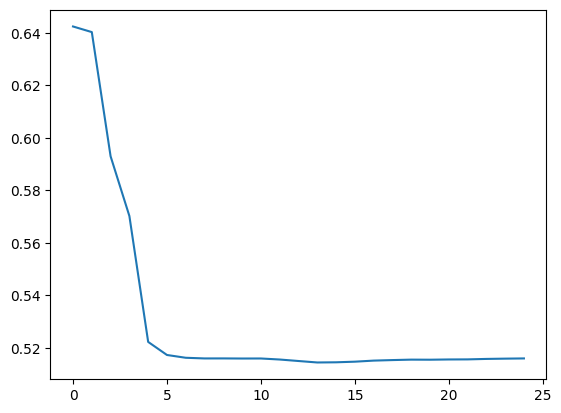

In [10]:
# Training curves
plt.figure()
plt.plot(loss_list)
plt.show()

### Model (hidden_size = 25)

In [11]:
# Initialize MNIST Autoencoder
torch.manual_seed(0)
model2 = MNIST_Autoencoder(hidden_layer = 25).to(device)

In [12]:
# Defining Parameters
# - MSE Loss, which will be our reconstruction loss for now
# - Adam as optimizer
# - 25 Epochs
# - 128 as batch size
num_epochs = 25
batch_size = 128
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), weight_decay = 1e-5)

In [13]:
# Trainer
outputs_list2 = []
loss_list2 = []
for epoch in range(num_epochs):
    for data in train_loader:
        
        # Flatten image and send data to device
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).to(device)
        
        # Forward pass
        output = model2(img)
        loss = distance(output, img)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Display
    print('epoch {}/{}, loss {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    outputs_list2.append((epoch, img, output),)
    loss_list2.append(loss.item())

epoch 1/25, loss 0.4540
epoch 2/25, loss 0.4213
epoch 3/25, loss 0.4004
epoch 4/25, loss 0.3902
epoch 5/25, loss 0.3868
epoch 6/25, loss 0.3853
epoch 7/25, loss 0.3844
epoch 8/25, loss 0.3840
epoch 9/25, loss 0.3837
epoch 10/25, loss 0.3834
epoch 11/25, loss 0.3831
epoch 12/25, loss 0.3828
epoch 13/25, loss 0.3826
epoch 14/25, loss 0.3824
epoch 15/25, loss 0.3823
epoch 16/25, loss 0.3821
epoch 17/25, loss 0.3820
epoch 18/25, loss 0.3820
epoch 19/25, loss 0.3820
epoch 20/25, loss 0.3819
epoch 21/25, loss 0.3819
epoch 22/25, loss 0.3818
epoch 23/25, loss 0.3817
epoch 24/25, loss 0.3817
epoch 25/25, loss 0.3816


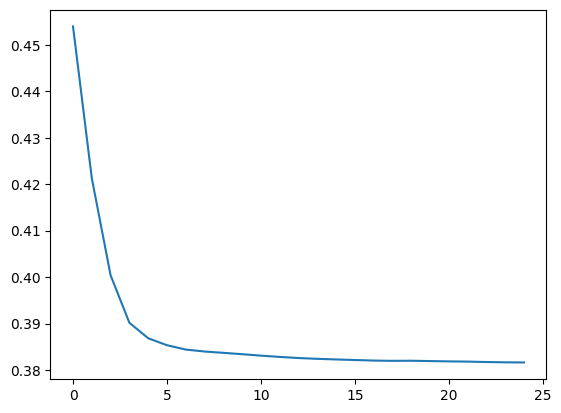

In [14]:
# Training curves
plt.figure()
plt.plot(loss_list2)
plt.show()

### Model (hidden_size = 125)

In [15]:
# Initialize MNIST Autoencoder
torch.manual_seed(0)
model3 = MNIST_Autoencoder(hidden_layer = 125).to(device)

In [16]:
# Defining Parameters
# - MSE Loss, which will be our reconstruction loss for now
# - Adam as optimizer
# - 25 Epochs
# - 128 as batch size
num_epochs = 25
batch_size = 128
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model3.parameters(), weight_decay = 1e-5)

In [17]:
# Trainer
outputs_list3 = []
loss_list3 = []
for epoch in range(num_epochs):
    for data in train_loader:
        
        # Flatten image and send data to device
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).to(device)
        
        # Forward pass
        output = model3(img)
        loss = distance(output, img)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Display
    print('epoch {}/{}, loss {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    outputs_list3.append((epoch, img, output),)
    loss_list3.append(loss.item())

epoch 1/25, loss 0.3178
epoch 2/25, loss 0.3083
epoch 3/25, loss 0.3043
epoch 4/25, loss 0.3014
epoch 5/25, loss 0.3002
epoch 6/25, loss 0.3000
epoch 7/25, loss 0.2994
epoch 8/25, loss 0.2990
epoch 9/25, loss 0.2987
epoch 10/25, loss 0.2985
epoch 11/25, loss 0.2984
epoch 12/25, loss 0.2982
epoch 13/25, loss 0.2981
epoch 14/25, loss 0.2979
epoch 15/25, loss 0.2977
epoch 16/25, loss 0.2976
epoch 17/25, loss 0.2975
epoch 18/25, loss 0.2974
epoch 19/25, loss 0.2972
epoch 20/25, loss 0.2970
epoch 21/25, loss 0.2969
epoch 22/25, loss 0.2968
epoch 23/25, loss 0.2968
epoch 24/25, loss 0.2968
epoch 25/25, loss 0.2968


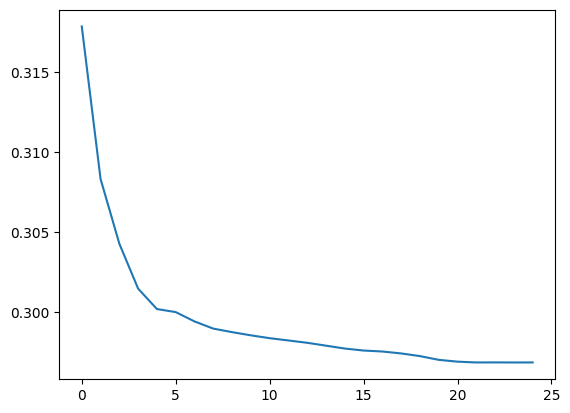

In [18]:
# Training curves
plt.figure()
plt.plot(loss_list3)
plt.show()

### Model (hidden_size = 784)

In [19]:
# Initialize MNIST Autoencoder
torch.manual_seed(0)
model4 = MNIST_Autoencoder(hidden_layer = 784).to(device)

In [20]:
# Defining Parameters
# - MSE Loss, which will be our reconstruction loss for now
# - Adam as optimizer
# - 25 Epochs
# - 128 as batch size
num_epochs = 25
batch_size = 128
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model4.parameters(), weight_decay = 1e-5)

In [21]:
# Trainer
outputs_list4 = []
loss_list4 = []
for epoch in range(num_epochs):
    for data in train_loader:
        
        # Flatten image and send data to device
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).to(device)
        
        # Forward pass
        output = model4(img)
        loss = distance(output, img)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Display
    print('epoch {}/{}, loss {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    outputs_list4.append((epoch, img, output),)
    loss_list4.append(loss.item())

epoch 1/25, loss 0.2840
epoch 2/25, loss 0.2806
epoch 3/25, loss 0.2782
epoch 4/25, loss 0.2751
epoch 5/25, loss 0.2737
epoch 6/25, loss 0.2730
epoch 7/25, loss 0.2731
epoch 8/25, loss 0.2721
epoch 9/25, loss 0.2732
epoch 10/25, loss 0.2726
epoch 11/25, loss 0.2724
epoch 12/25, loss 0.2727
epoch 13/25, loss 0.2726
epoch 14/25, loss 0.2723
epoch 15/25, loss 0.2732
epoch 16/25, loss 0.2752
epoch 17/25, loss 0.2714
epoch 18/25, loss 0.2717
epoch 19/25, loss 0.2735
epoch 20/25, loss 0.2725
epoch 21/25, loss 0.2708
epoch 22/25, loss 0.2707
epoch 23/25, loss 0.2726
epoch 24/25, loss 0.2728
epoch 25/25, loss 0.2715


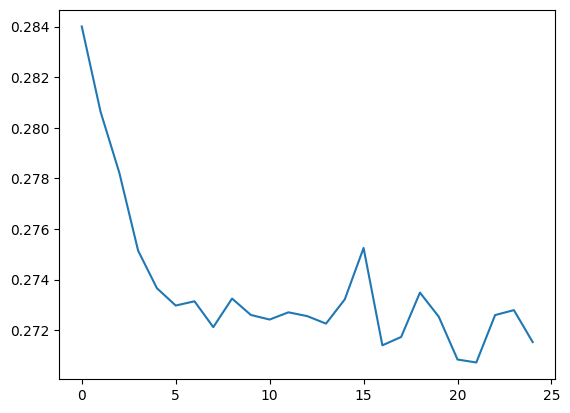

In [22]:
# Training curves
plt.figure()
plt.plot(loss_list4)
plt.show()

### Visualization

Below, we get to see the effect of different hidden_size values on the autoencoders.

In [26]:
data_iter = iter(test_loader)
data = next(data_iter, None)
img, _ = data
img = img.view(img.size(0), -1)
img = Variable(img).to(device)
out1 = model(img).cpu().detach().numpy().reshape(5, 28, 28)
out2 = model2(img).cpu().detach().numpy().reshape(5, 28, 28)
out3 = model3(img).cpu().detach().numpy().reshape(5, 28, 28)
out4 = model4(img).cpu().detach().numpy().reshape(5, 28, 28)
img = img.cpu().detach().numpy().reshape(5, 28, 28)

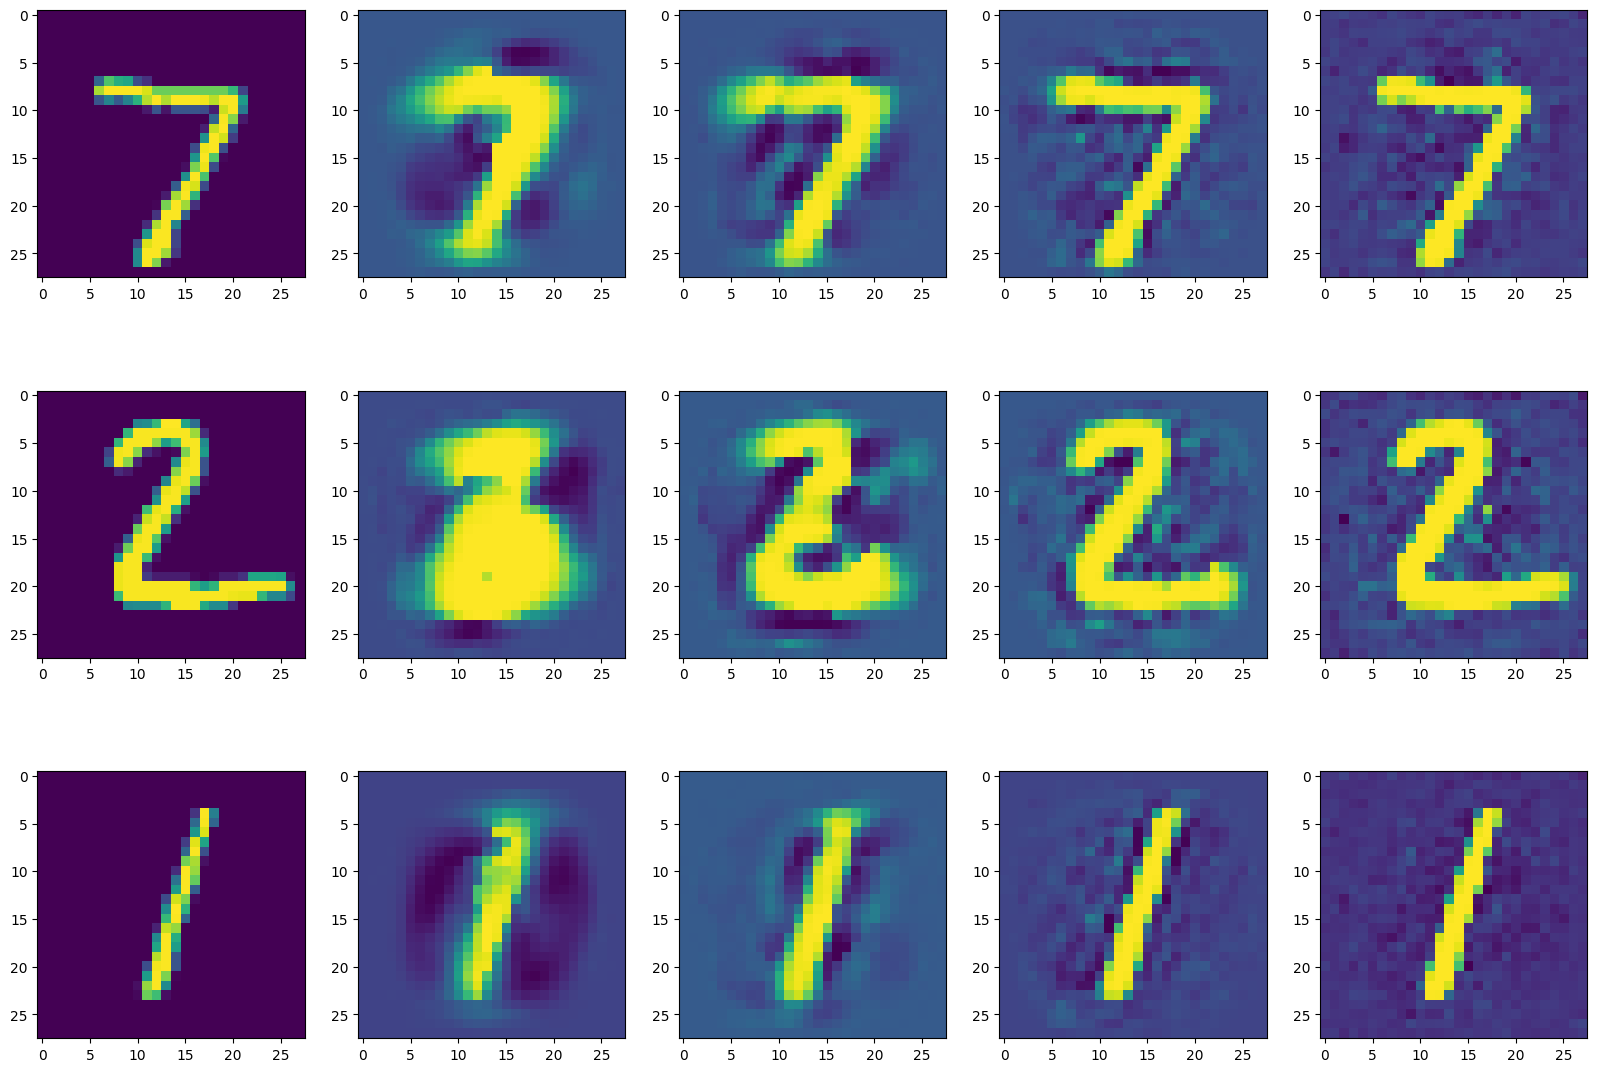

In [27]:
plt.figure(figsize = (20, 14))
n = 3
for i in range(n):
    plt.subplot(n, 5, 5*i + 1)
    plt.imshow(img[i])
    plt.subplot(n, 5, 5*i + 2)
    plt.imshow(out1[i])
    plt.subplot(n, 5, 5*i + 3)
    plt.imshow(out2[i])
    plt.subplot(n, 5, 5*i + 4)
    plt.imshow(out3[i])
    plt.subplot(n, 5, 5*i + 5)
    plt.imshow(out4[i])

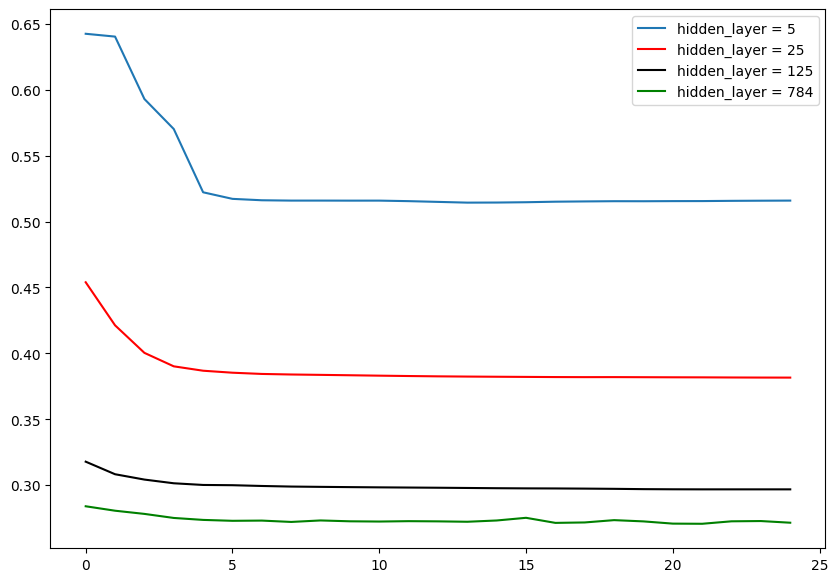

In [28]:
plt.figure(figsize = (10, 7))
plt.plot(loss_list, label = "hidden_layer = 5")
plt.plot(loss_list2, 'r', label = "hidden_layer = 25")
plt.plot(loss_list3, 'k', label = "hidden_layer = 125")
plt.plot(loss_list4, 'g', label = "hidden_layer = 784")
plt.legend(loc = 'best')
plt.show()